In [73]:
import os
import pandas as pd
from lda import LDA
from sklearn import model_selection
from sklearn import preprocessing  ## sklern is ML library-- preprocessing
from sklearn.ensemble import RandomForestClassifier ##Random Forest
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

dataset = pd.read_csv('train.csv',index_col=None)

kaggletest = pd.read_csv('test.csv')

#to check if there are null values - came to be 0
#sum(dataset.isnull().values.ravel())

In [83]:
dataset

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5
5,6,2579,132,6,300,-15,67,230,237,140,...,0,0,0,0,0,0,0,0,0,2
6,7,2606,45,7,270,5,633,222,225,138,...,0,0,0,0,0,0,0,0,0,5
7,8,2605,49,4,234,7,573,222,230,144,...,0,0,0,0,0,0,0,0,0,5
8,9,2617,45,9,240,56,666,223,221,133,...,0,0,0,0,0,0,0,0,0,5
9,10,2612,59,10,247,11,636,228,219,124,...,0,0,0,0,0,0,0,0,0,5


In [103]:
import math
X = dataset
K = kaggletest
X = X.drop(['Cover_Type'],axis=1)
X = X.drop(['Id'],axis=1)
Y = dataset['Cover_Type']

X = X.as_matrix()
Y = Y.as_matrix()

K = K.drop(['Id'],axis=1)
K_mat = K.as_matrix()

X, Y = shuffle(X, Y, random_state=0)

#compute how much of the data is training and testing
train_rows = int(math.floor(0.7* dataset.shape[0]))
test_rows = dataset.shape[0] - train_rows
    
# separate out training and testing data
trainX = X[:train_rows,:]
trainY = Y[:train_rows]
testX = X[train_rows:,:]
testY = Y[train_rows:]

print (trainX.shape,trainY.shape,testX.shape,testY.shape)

(10584, 54) (10584,) (4536, 54) (4536,)


In [104]:
print (trainX.shape)
print (K_mat.shape)

(10584, 54)
(565892, 54)


In [105]:
# std_scale = preprocessing.StandardScaler().fit(trainX)
# trainX = std_scale.transform(trainX)
# testX = std_scale.transform(testX)
# K_mat = std_scale.transform(K_mat)
print (trainX.shape,trainY.shape,testX.shape,testY.shape)
# lda = LDA() #n_components=30
# lda = lda.fit(trainX,trainY)
# trainX = lda.transform(trainX)
# testX = lda.transform(testX)
# print (trainX.shape,trainY.shape,testX.shape,testY.shape)



(10584, 54) (10584,) (4536, 54) (4536,)


In [112]:
#Random Forest
rf = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=5,min_samples_split=4,verbose=0,
                           random_state=0) ## create RF object

sfm = SelectFromModel(rf, threshold=0.05)  ## set the cut off
sfm.fit(trainX, trainY)
n_features=sfm.transform(trainX).shape[1]
print (n_features)
Imp_X= sfm.transform(trainX)
print (Imp_X)
                    

6
[[2220  828    1    0    0    0]
 [2139  933    1    0    0    0]
 [2292  876    1    1    0    0]
 ..., 
 [2275  638    1    0    0    0]
 [3154 3690    0    0    0    0]
 [3139 1343    0    0    0    0]]


In [113]:
scores = cross_validation.cross_val_score(rf, Imp_X,trainY, scoring='accuracy',cv=3) ##scoring='mean_squared_error'
rf_model2 = rf.fit(Imp_X,trainY) ## Train the model for 2013
print ("With important ",n_features," features ",scores,) ## Cross validation score

scores = cross_validation.cross_val_score(rf, trainX,trainY, scoring='accuracy',cv=3) ##scoring='mean_squared_error'
rf_model1 = rf.fit(trainX,trainY) ## Train the model for 2013
print ("With all features ",scores) ## Cross validation score


With important  6  features  [ 0.63824363  0.61904762  0.64435621]
With all features  [ 0.70509915  0.69047619  0.69852524]


In [108]:
predY = rf_model1.predict(testX)
cm = confusion_matrix(testY, predY)
print (cm)

[[389  70   1   0  55   3 139]
 [171 287  11   0 143  22  20]
 [  0   3 374  96  39 121   0]
 [  0   0  25 645   0   9   0]
 [  2  64  19   0 547  21   0]
 [  0   2 129  60  42 390   0]
 [ 46   0   0   0   7   0 584]]


In [102]:
rf_model=rf.fit(X,Y)
predY = rf_model.predict(K_mat)
output = pd.DataFrame( data={"Id":kaggletest["Id"], "Cover_Type":predY} )
output.to_csv( "rf.csv", index=False ,columns=["Id","Cover_Type"])

In [109]:
### Repeat the same step for SVM
### SVM ####

lin_svm = svm.LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

scores_svm = cross_validation.cross_val_score(lin_svm, trainX,trainY, scoring='accuracy',cv=3) ##scoring='mean_squared_error'
svm_model=lin_svm.fit(trainX,trainY) ## Train the model 

print (scores_svm) ## Cross validation score

predY = svm_model.predict(testX)
cm_svm = confusion_matrix(testY, predY)
print (cm_svm)

[ 0.15439093  0.23781179  0.36301758]
[[654   0   0   0   0   0   3]
 [649   0   5   0   0   0   0]
 [373   0 203  37   2  18   0]
 [149   0  94 414   0  22   0]
 [652   0   0   0   0   0   1]
 [493   0 101  16   0  13   0]
 [617   0   0   0   0   0  20]]


In [110]:
logreg = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, 
                            intercept_scaling=1, class_weight=None, random_state=None, 
                            solver='liblinear', max_iter=1000, multi_class='ovr', verbose=0, 
                            warm_start=False, n_jobs=1)

scores_logreg = model_selection.cross_val_score(logreg, trainX,trainY, scoring='accuracy',cv=3) ##scoring='mean_squared_error'
logreg_model=logreg.fit(trainX,trainY) ## Train the model 

print (scores_logreg) ## Cross validation score

predY = logreg_model.predict(testX)
cm_logreg = confusion_matrix(testY, predY)
print (cm_logreg)


[ 0.66968839  0.67176871  0.67498582]
[[415 115   3   0  37   6  81]
 [144 347  20   0 110  28   5]
 [  0   3 327  85  30 188   0]
 [  0   0  50 584   0  45   0]
 [ 22 146  47   0 413  25   0]
 [  0  14 147  58  44 360   0]
 [ 71  11   4   0   5   0 546]]


In [111]:
bdt_discrete = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=600,
    learning_rate=1.5,
    algorithm="SAMME")

scores_bdt_discrete = model_selection.cross_val_score(bdt_discrete, trainX,trainY, scoring='accuracy',cv=3) ##scoring='mean_squared_error'
bdt_discrete_model=logreg.fit(trainX,trainY) ## Train the model 

print (scores_bdt_discrete) ## Cross validation score

predY = bdt_discrete_model.predict(testX)
cm_bdt_discrete = confusion_matrix(testY, predY)
print (cm_bdt_discrete)

[ 0.52917847  0.50113379  0.53318208]
[[415 115   3   0  37   6  81]
 [144 347  20   0 110  28   5]
 [  0   3 327  85  30 188   0]
 [  0   0  50 584   0  45   0]
 [ 22 146  47   0 413  25   0]
 [  0  14 147  58  44 360   0]
 [ 71  11   4   0   5   0 546]]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x16417a4e0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1922ea668>]], dtype=object)

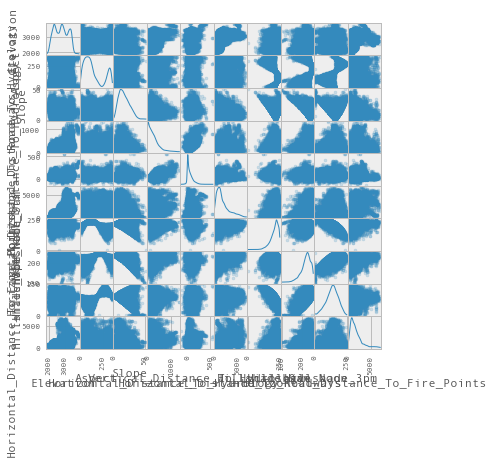

In [51]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(dataset[cols_to_plot], alpha=0.2, figsize=(6, 6), diagonal='kde')

/Users/Madhu/Downloads/softwares/anaconda3/envs/py3k/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


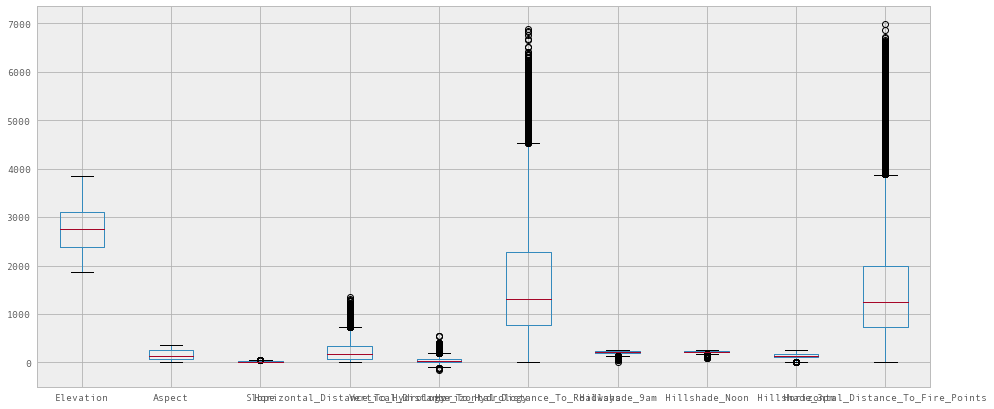

In [50]:
from matplotlib import pyplot as plt

pd.options.display.mpl_style = 'default'
%matplotlib inline
cols_to_plot = ['Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']
dataset[cols_to_plot].plot(kind='box',figsize=(16,7))

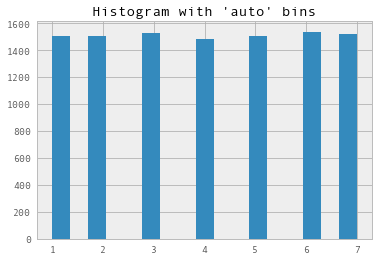

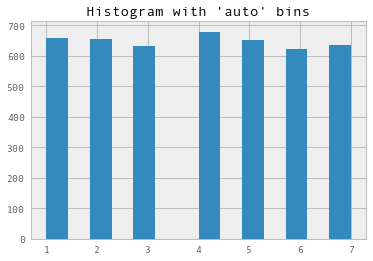

In [57]:
import matplotlib.pyplot as plt
rng = np.random.RandomState(10)  # deterministic random data
plt.hist(trainY, bins='auto')  # plt.hist passes it's arguments to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

rng = np.random.RandomState(10)  # deterministic random data
plt.hist(testY, bins='auto')  # plt.hist passes it's arguments to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()